In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Embedding, Dense, Dropout
from tensorflow.keras.models import Sequential, Model

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/mnistdataset/ecg_autoencoder_dataset.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,-0.363808,-0.491957,-0.421855,-0.309201,-0.495939,-0.342119,-0.355336,-0.367913,-0.316503,-0.412374,-0.471672,-0.413458,-0.364617,-0.449298,-0.471419,-0.424777,-0.462517,-0.552472,-0.475375,-0.694200,-0.701868,-0.593812,-0.660684,-0.713831,-0.769807,-0.672282,-0.653676,-0.639406,-0.559302,-0.591670,-0.493223,-0.463052,-0.301644,-0.232734,-0.125055,-0.153943,-0.024357,-0.065609,0.034999,0.061935,...,0.337875,0.221405,0.273997,0.298664,0.263564,0.342564,0.419505,0.586607,0.860624,1.173345,1.258179,1.433789,1.700533,1.999043,2.125341,1.993291,1.932246,1.797437,1.522284,1.251168,0.998730,0.483722,0.023132,-0.194914,-0.220917,-0.243737,-0.254695,-0.291136,-0.256490,-0.227874,-0.322423,-0.289286,-0.318170,-0.363654,-0.393456,-0.266419,-0.256823,-0.288694,-0.162338,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,0.148951,0.183527,0.294876,0.190233,0.235575,0.253487,0.221742,0.050233,0.178042,0.139563,0.046794,0.043007,0.106544,0.012654,0.003995,0.045724,-0.045999,-0.072667,-0.071078,-0.153866,-0.227254,-0.249270,-0.253489,-0.332835,-0.264330,-0.345825,-0.310781,-0.334160,-0.306178,-0.174563,-0.206160,-0.224480,-0.048684,-0.019621,0.094805,0.116786,0.185186,0.230526,0.138027,0.244426,...,0.172847,0.150779,0.176566,0.280942,0.489939,0.660889,0.893193,1.026997,1.202394,1.557410,1.808428,2.164346,2.070747,1.903614,1.764455,1.507769,1.293428,0.894562,0.578016,0.244343,-0.286443,-0.515881,-0.732707,-0.832465,-0.803318,-0.836252,-0.777865,-0.774753,-0.733404,-0.721386,-0.832095,-0.711982,-0.751867,-0.757720,-0.853120,-0.766988,-0.688161,-0.519923,0.039406,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,-0.282897,-0.356926,-0.287297,-0.399489,-0.473244,-0.379048,-0.399039,-0.178594,-0.339522,-0.498447,-0.337251,-0.425480,-0.423952,-0.463170,-0.493253,-0.549749,-0.529831,-0.530935,-0.502365,-0.417368,-0.526346,-0.471005,-0.676784,-0.898612,-0.610571,-0.530164,-0.765674,-0.581937,-0.537848,-0.556386,-0.438023,-0.436248,-0.400114,-0.134987,-0.239347,-0.120244,-0.001971,0.285000,0.315646,0.107364,...,0.403937,0.298191,0.461101,0.664659,0.587757,0.701325,0.917205,1.247987,1.505568,1.640105,1.810988,2.185398,2.262985,2.052920,1.890488,1.793033,1.564784,1.234619,0.900302,0.551957,0.258222,-0.128587,-0.092585,-0.168606,-0.495989,-0.395034,-0.328238,-0.448138,-0.268230,-0.456415,-0.357867,-0.317508,-0.434112,-0.549203,-0.324615,-0.268082,-0.220384,-0.117429,0.614059,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,-0.183319,-0.101657,-0.273874,-0.127818,-0.195983,-0.213523,-0.176473,-0.156932,-0.149172,-0.181510,-0.180074,-0.246151,-0.274260,-0.140960,-0.277449,-0.382549,-0.311937,-0.360093,-0.405968,-0.571433,-0.524106,-0.537886,-0.606778,-0.661446,-0.683375,-0.746683,-0.635662,-0.625231,-0.540094,-0.674995,-0.653949,-0.566916,-0.524045,-0.414711,-0.387787,-0.284437,-0.072745,-0.160125,-0.092160,0.067165,...,0.371639,0.445170,0.484170,0.556061,0.658724,0.861158,1.016397,1.135606,1.216973,1.553079,1.772155,2.000769,1.925003,1.898426,1.720953,1.501711,1.422492,1.023225,0.776341,0.504426,0.056382,-0.233161,-0.406388,-0.327528,-0.460868,-0.402536,-0.345752,-0.354206,-0.439959,-0.425326,-0.439

In [ ]:
df.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            131, 132, 133, 134, 135, 136, 137, 138, 139, 140],
           dtype='int64', length=141)

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
count,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,...,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,-0.262502,-1.649828,-2.492623,-3.119754,-3.167656,-2.866306,-2.272845,-1.797754,-1.409784,-0.935806,-0.586130,-0.434278,-0.337449,-0.258099,-0.184456,-0.120129,-0.070506,-0.041937,-0.037130,-0.041337,-0.049010,-0.060307,-0.070843,-0.085600,-0.101286,-0.116194,-0.134578,-0.155946,-0.177672,-0.200843,-0.224423,-0.246854,-0.271651,-0.290474,-0.304663,-0.315294,-0.317019,-0.313238,-0.303382,-0.287468,-0.261418,-0.228090,-0.191085,-0.150887,-0.108158,-0.069550,-0.035785,-0.008608,0.013249,0.029276,...,0.442577,0.450789,0.466063,0.495492,0.540774,0.602075,0.671335,0.751093,0.842592,0.946685,1.051536,1.138315,1.187783,1.202143,1.191057,1.154773,1.086526,0.987001,0.864503,0.720300,0.569957,0.428874,0.319608,0.242431,0.180869,0.134522,0.109577,0.093447,0.080869,0.065658,0.047197,0.025245,0.004376,-0.009969,-0.019308,-0.026427,-0.029722,0.000602,0.086755,0.146633,0.071312,-0.062622,-0.276086,-0.507750,-0.761323,-0.835173,-0.642739,-0.487667,-0.706574,0.584034
std,1.152450,1.445542,1.386457,1.302921,1.104535,0.906312,0.731594,0.622794,0.636863,0.657788,0.591967,0.493568,0.426136,0.393470,0.382495,0.386314,0.400829,0.415265,0.423789,0.429737,0.434978,0.441769,0.447734,0.454604,0.461603,0.472735,0.483584,0.492048,0.503456,0.516152,0.530018,0.543060,0.552284,0.560660,0.564907,0.566459,0.560786,0.548962,0.536246,0.517517,0.494573,0.469287,0.437110,0.402656,0.370481,0.339772,0.312632,0.290688,0.275618,0.266083,...,0.251543,0.260884,0.273520,0.285261,0.304260,0.332749,0.372040,0.411124,0.461274,0.520055,0.574648,0.614846,0.623061,0.608324,0.582758,0.553968,0.531302,0.507281,0.485679,0.483575,0.511429,0.546471,0.565638,0.572041,0.573811,0.584503,0.589670,0.591625,0.597142,0.603989,0.610285,0.619744,0.633055,0.649124,0.667342,0.680240,0.693360,0.751323,0.919556,1.170839,1.404425,1.646105,1.894515,2.059366,2.086130,2.056296,1.859409,1.831088,1.414414,0.492937
min,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,-4.142476,-4.040526,-3.724538,-3.264576,-3.222345,-3.263484,-3.219212,-3.202187,-3.147504,-3.459917,-4.102102,-4.311241,-4.099888,-3.614973,-3.822298,-3.795567,-3.690817,-3.542485,-3.631665,-3.587112,-3.452215,-4.074752,-4.137454,-4.059662,-3.626646,-2.829471,-3.585866,-4.003401,-3.900724,-3.325329,-3.911093,-4.862443,-4.710268,-4.238206,-4.247936,-3.892782,-3.135950,-3.010092,-2.951892,-3.179057,-3.434700,...,-2.736233,-2.736669,-3.144729,-3.258503,-3.213893,-3.364297,-3.324015

In [ ]:
features = df.drop([140], axis=1)
target = df[140]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
obj = MinMaxScaler()

In [ ]:
features = obj.fit_transform(features)
pd.DataFrame(features).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139
count,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,...,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,0.552928,0.514713,0.338742,0.308891,0.293518,0.354793,0.377298,0.411008,0.462474,0.530809,0.568762,0.559150,0.517577,0.524128,0.567684,0.579813,0.542851,0.591849,0.613676,0.657254,0.669702,0.652421,0.630827,0.647280,0.642041,0.631821,0.621421,0.621070,0.625126,0.610876,0.648540,0.627443,0.631254,0.600275,0.534954,0.603389,0.643973,0.649904,0.615574,0.655904,0.711931,0.707047,0.658323,0.717290,0.692255,0.656241,0.624435,0.644763,0.678634,0.699333,...,0.612165,0.602564,0.615346,0.636271,0.612532,0.608766,0.658045,0.690670,0.704387,0.649324,0.643881,0.673735,0.691626,0.683220,0.710927,0.659523,0.673211,0.712793,0.720824,0.721904,0.691745,0.607328,0.546387,0.518370,0.527250,0.568354,0.563390,0.584810,0.581550,0.603743,0.605918,0.559132,0.525725,0.499910,0.496359,0.549988,0.594458,0.577577,0.546448,0.581617,0.594048,0.590740,0.606422,0.571607,0.540667,0.516233,0.486623,0.534774,0.523265,0.399105
std,0.098534,0.136758,0.177909,0.179391,0.146826,0.130507,0.109998,0.101838,0.110661,0.108885,0.097467,0.083877,0.075350,0.069572,0.070521,0.072276,0.069480,0.079140,0.075982,0.069555,0.068346,0.071349,0.079693,0.078748,0.080223,0.083557,0.088180,0.087923,0.092309,0.096976,0.089275,0.087580,0.092036,0.100879,0.119692,0.104506,0.097963,0.099449,0.109234,0.093675,0.076527,0.074028,0.071102,0.070495,0.067766,0.072715,0.065635,0.063679,0.058592,0.053719,...,0.045635,0.047682,0.050364,0.048198,0.046545,0.049332,0.055205,0.064314,0.074025,0.079391,0.092787,0.105021,0.112704,0.112632,0.118531,0.112209,0.103993,0.100503,0.094934,0.081916,0.079307,0.084836,0.098303,0.108483,0.103244,0.093539,0.099364,0.100798,0.095705,0.088188,0.085803,0.100870,0.103340,0.103866,0.103727,0.092848,0.085534,0.094000,0.107955,0.130402,0.168887,0.195748,0.222079,0.254541,0.274547,0.245383,0.247360,0.204881,0.177657,0.104815
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [ ]:
from sklearn.model_selection import train_test_split
target.value_counts()

1    2919
0    2079
Name: 140, dtype: int64

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(features, target, stratify=target, test_size=0.2)

In [ ]:
ytrain = ytrain.astype(bool)
ytest = ytest.astype(bool)
normal_train = xtrain[ytrain]
normal_test = xtest[ytest]
fraud_train = xtrain[~ytrain]
fraud_test = xtest[~ytest]
normal_train.shape

(2335, 140)

In [ ]:
ytrain.value_counts()

True     2335
False    1663
Name: 140, dtype: int64

In [ ]:
class AutoEncoder(Model):
  def __init__(self, output_dim, ldim=8):
    super().__init__()
    self.encoder = Sequential([
        Dense(64, activation='relu'),
        Dropout(0.1),
        Dense(32, activation='relu'),
        Dropout(0.1),
        Dense(16, activation='relu'),
        Dropout(0.1),
        Dense(ldim, activation='relu'),
        Dropout(0.1),
    ])
    self.decoder = Sequential([
        Dense(16, activation='relu'),
        Dropout(0.1),
        Dense(32, activation='relu'),
        Dropout(0.1),
        Dense(64, activation='relu'),
        Dropout(0.1),
        Dense(output_dim, activation='relu'),
        Dropout(0.1),
    ])

  def call(self, inputs):
    en = self.encoder(inputs)
    de = self.decoder(en)
    return de


In [ ]:
model = AutoEncoder(output_dim=normal_train.shape[1])
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
h = model.fit(normal_train, normal_train, validation_data=(normal_test, normal_test), epochs=20)

Epoch 1/20
73/73 [==============================] - 4s 12ms/step - loss: 0.1488 - mse: 0.1488 - val_loss: 0.0411 - val_mse: 0.0411
Epoch 2/20
73/73 [==============================] - 1s 8ms/step - loss: 0.0563 - mse: 0.0563 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 3/20
73/73 [==============================] - 1s 8ms/step - loss: 0.0490 - mse: 0.0490 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 4/20
73/73 [==============================] - 0s 6ms/step - loss: 0.0482 - mse: 0.0482 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 5/20
73/73 [==============================] - 0s 6ms/step - loss: 0.0480 - mse: 0.0480 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 6/20
73/73 [==============================] - 0s 5ms/step - loss: 0.0476 - mse: 0.0476 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 7/20
73/73 [==============================] - 0s 6ms/step - loss: 0.0476 - mse: 0.0476 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 8/20
73/73 [==============================] - 0s 6ms/step - loss: 0.0470 - mse: 0.0

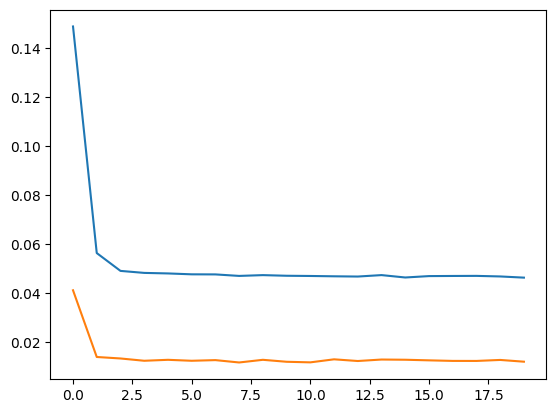

In [ ]:
plt.plot(np.arange(20), h.history['loss'], label='loss')
plt.plot(np.arange(20), h.history['val_loss'], label='val_loss')


Exception ignored in: <function _xla_gc_callback at 0x7ff3860436d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 101, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


1/1 [==============================] - 0s 20ms/step


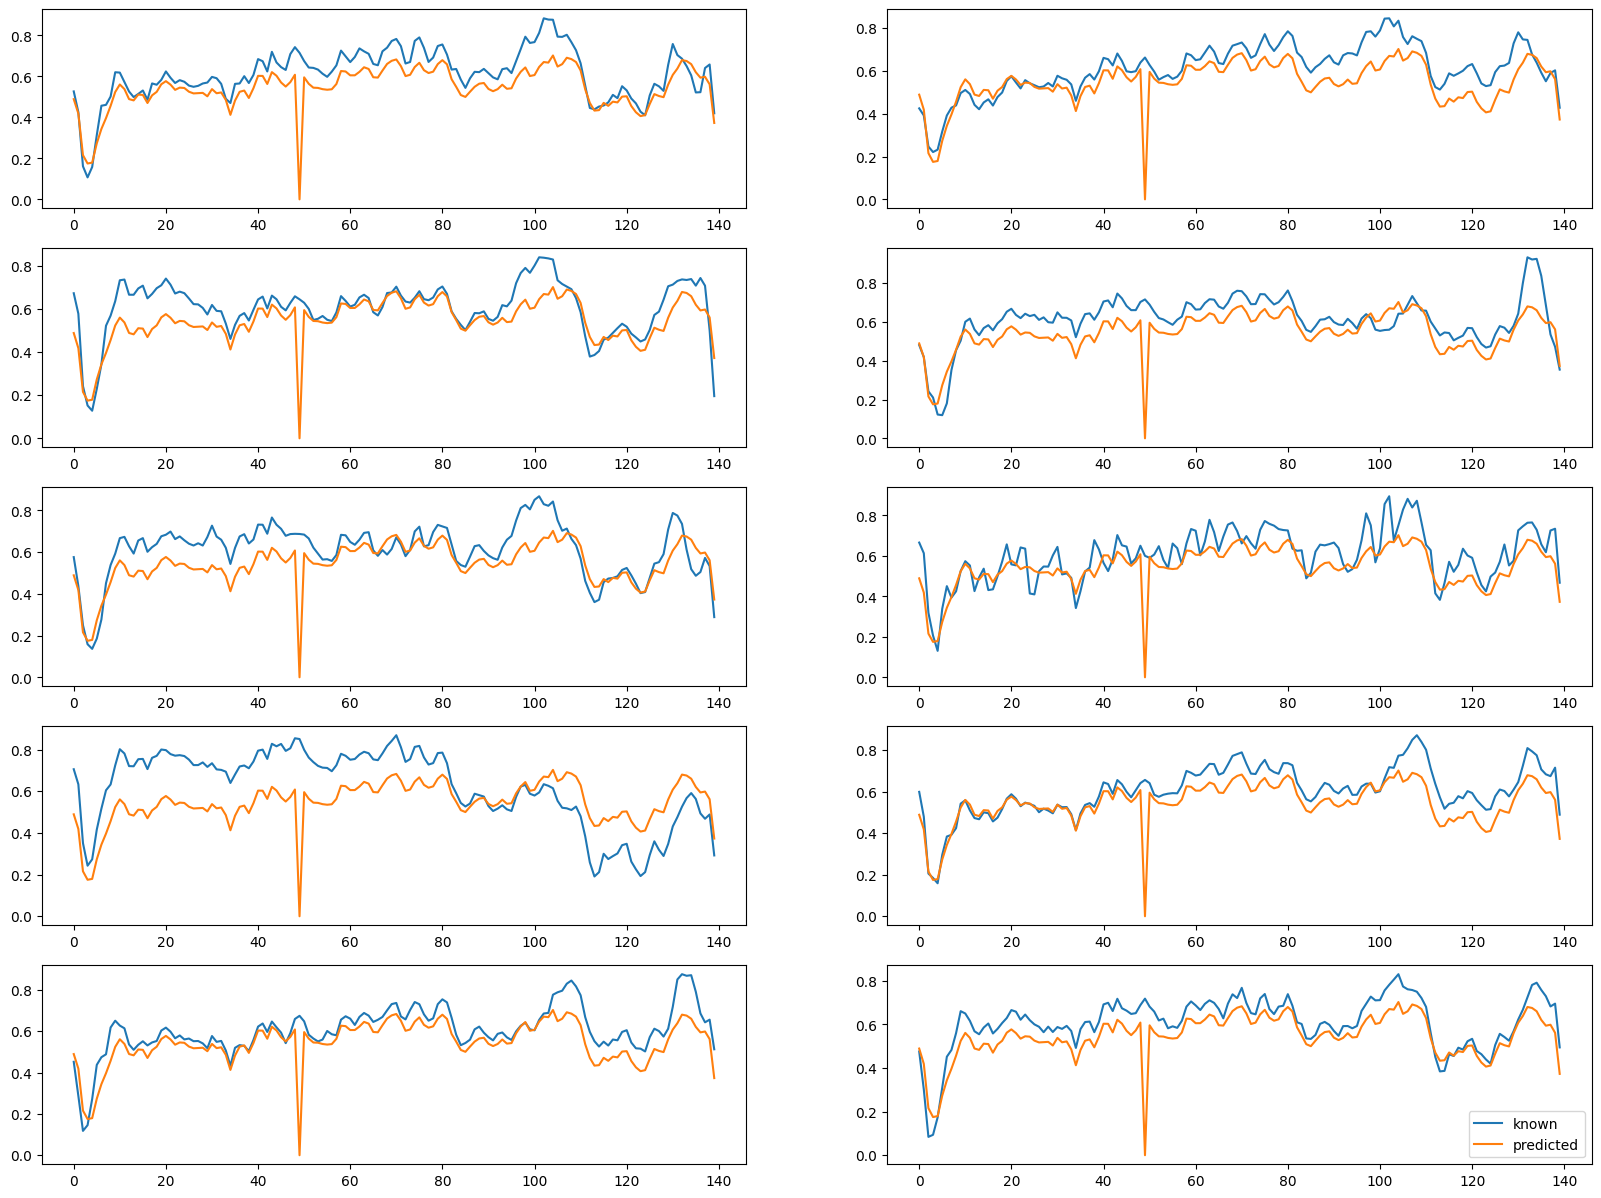

In [22]:
sub2 = normal_train[:10]
preds1 = model.predict(sub2)
f, a = plt.subplots(5,2,figsize=(20, 15))
cnt = 0
for i in range(10):
    a[i % 5, i % 2].plot(sub2[cnt], label='known')
    a[i % 5, i % 2].plot(preds1[cnt], label='predicted')
    cnt += 1
plt.legend()
plt.show()

1/1 [==============================] - 0s 172ms/step


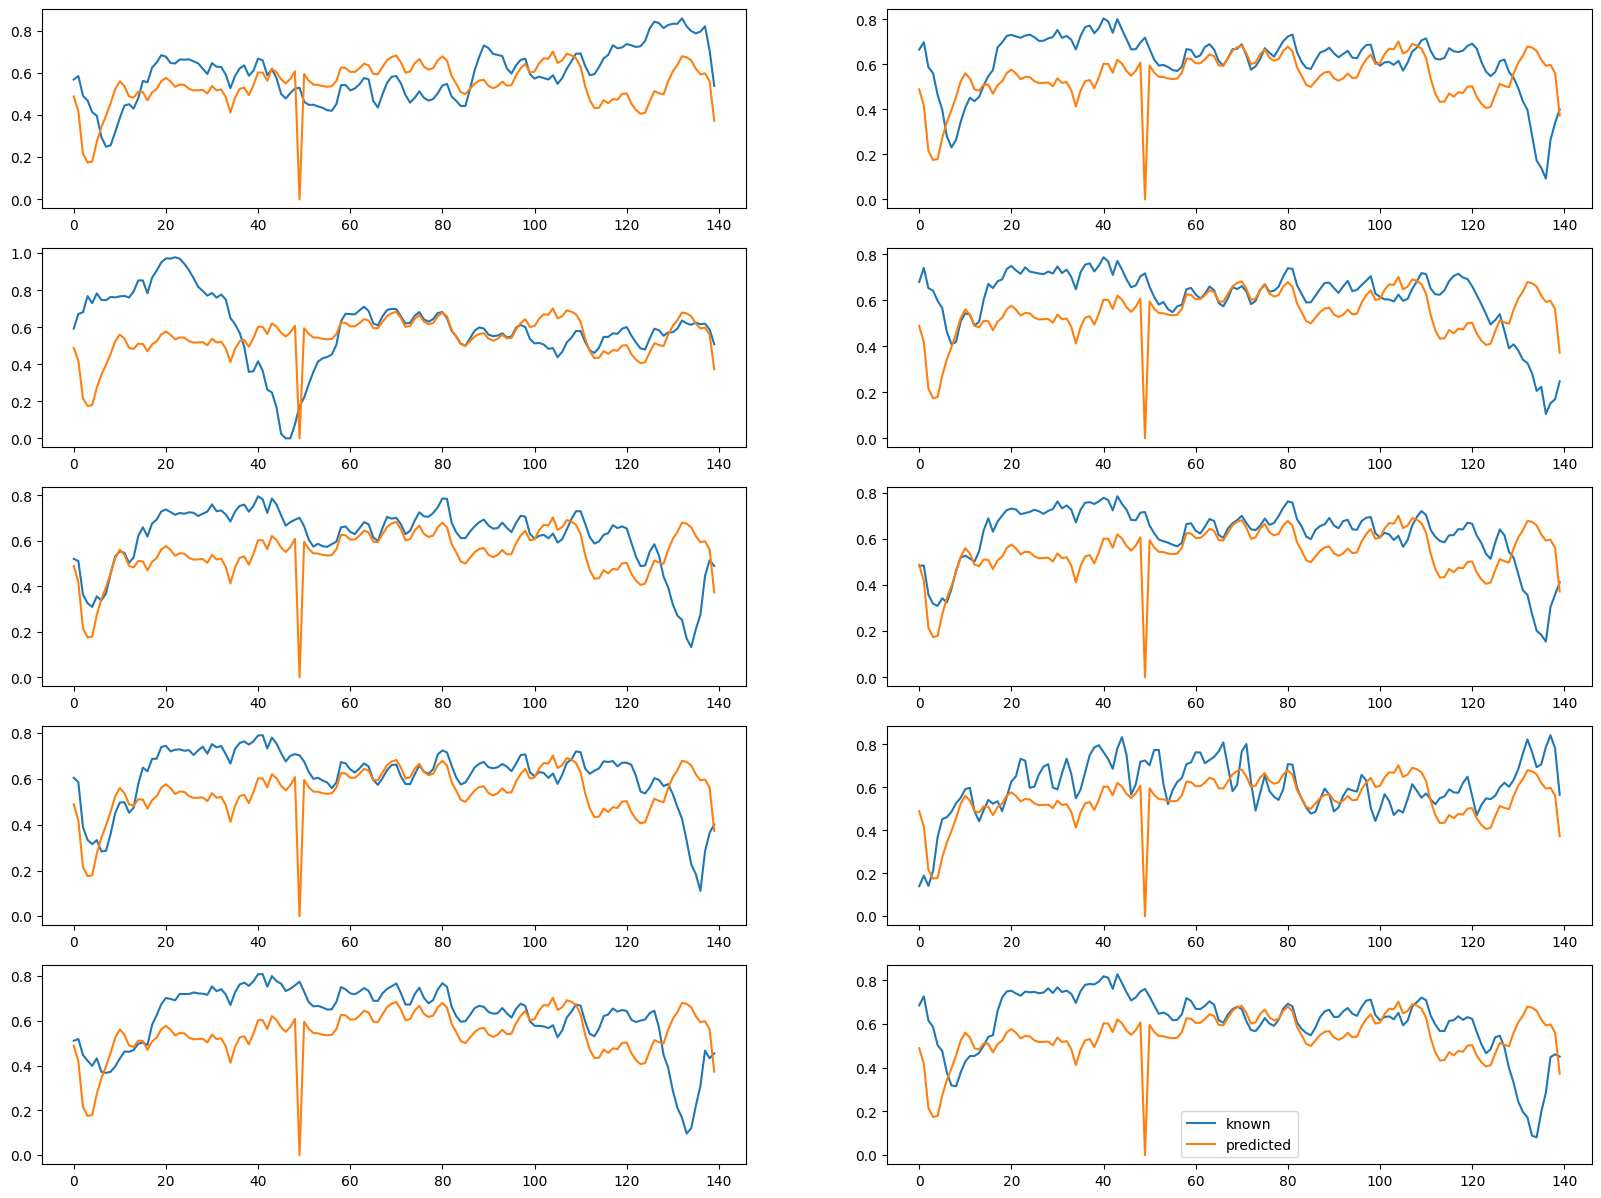

In [23]:
sub2 = fraud_train[:10]
preds1 = model.predict(sub2)
f, a = plt.subplots(5,2,figsize=(20, 15))
cnt = 0
for i in range(10):
    a[i % 5, i % 2].plot(sub2[cnt], label='known')
    a[i % 5, i % 2].plot(preds1[cnt], label='predicted')
    cnt += 1
plt.legend()
plt.show()

In [24]:
preds = model.predict(xtrain)
mse = np.mean(np.power(xtrain-preds, 2), axis=1)
mse

125/125 [==============================] - 0s 3ms/step


array([0.02386513, 0.00876619, 0.00868939, ..., 0.01035018, 0.03340811,
       0.00905636])

In [25]:
err_df = pd.DataFrame({'mse': mse, 'class': ytrain})
err_df.groupby('class').describe()

mse                                                                      
        count      mean       std       min       25%       50%       75%       max
class                                                                              
False  1663.0  0.029057  0.007561  0.008437  0.025026  0.028590  0.032224  0.083367
True   2335.0  0.011660  0.006133  0.007641  0.008697  0.009783  0.012036  0.067696

In [33]:
thres = 0.011660 + 4 * 0.006133

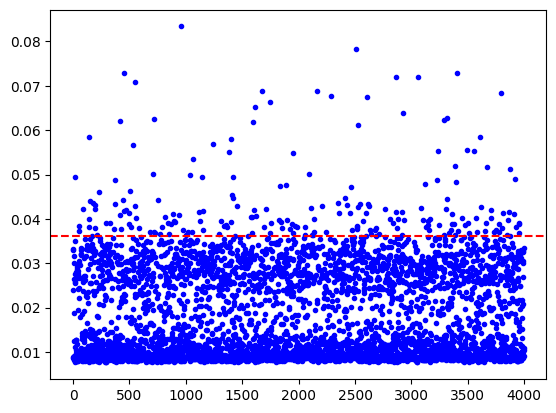

In [34]:
plt.plot(mse, linestyle='', color='blue', marker='o', markersize=3, label='mse')
plt.axhline(thres, linestyle='--', color='red')

In [36]:
ytest.value_counts()

True     584
False    416
Name: 140, dtype: int64

In [47]:
thres = (0.011660 + 0.006133)/2
preds1 = model.predict(xtrain)
mse1 = np.mean(np.power(xtrain-preds1, 2), axis=1)
youts = [(lambda x: 1 if x>=thres else 0)(err) for err in mse1]
from sklearn.metrics import classification_report as cf
print(cf(ytrain, youts))

125/125 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

       False       0.00      0.00      0.00      1663
        True       0.49      0.69      0.57      2335

    accuracy                           0.40      3998
   macro avg       0.25      0.34      0.29      3998
weighted avg       0.29      0.40      0.34      3998



0.0088965